In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("../Dataset/hair_loss.csv")

In [3]:
df

,total_protein,total_keratine,hair_texture,vitamin,manganese,iron,calcium,body_water_content,stress_level,liver_data,hair_fall
0,312,100,14,249,87,55,333,44,41,368,4
1,52,207,3,425,387,1,182,26,65,41,1
2,170,197,11,140,199,91,414,30,54,90,4
3,256,334,19,358,120,3,35,48,45,65,2
4,309,185,58,207,329,301,345,23,90,346,4
...,...,...,...,...,...,...,...,...,...,...,...
99995,440,20,63,209,473,260,12,86,7,281,5
99996,311,233,37,352,194,159,391,57,76,30,5
99997,27,210,10,185,376,278,96,40,49,110,3
99998,450,18,35,250,287,157,81,31,2,156,1


### Feature Selection

In [4]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [5]:
#PCA Plot
X = df.drop("hair_fall", axis=1)
y = df["hair_fall"]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

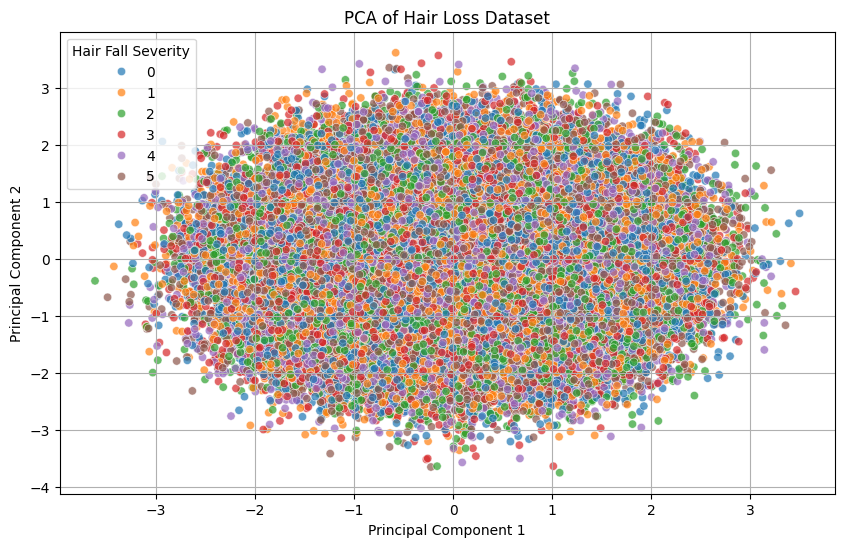

In [6]:
# ---------- PCA ----------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for plotting
pca_df = pd.DataFrame(data=X_pca, columns=["PC1", "PC2"])
pca_df["hair_fall"] = y

# Plot PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="hair_fall", palette="tab10", alpha=0.7)
plt.title("PCA of Hair Loss Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Hair Fall Severity")
plt.grid(True)
plt.show()

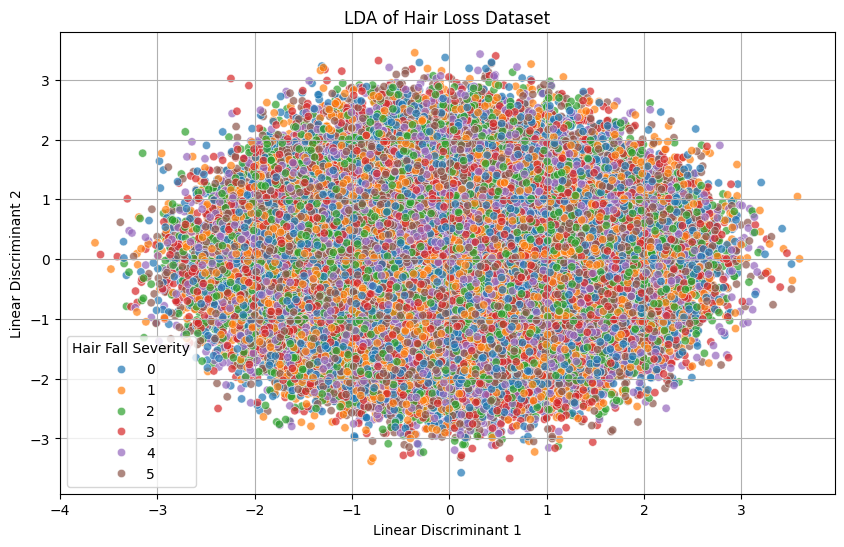

In [7]:
# ---------- LDA ----------
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

# Create a DataFrame for plotting
lda_df = pd.DataFrame(data=X_lda, columns=["LD1", "LD2"])
lda_df["hair_fall"] = y

# Plot LDA
plt.figure(figsize=(10, 6))
sns.scatterplot(data=lda_df, x="LD1", y="LD2", hue="hair_fall", palette="tab10", alpha=0.7)
plt.title("LDA of Hair Loss Dataset")
plt.xlabel("Linear Discriminant 1")
plt.ylabel("Linear Discriminant 2")
plt.legend(title="Hair Fall Severity")
plt.grid(True)
plt.show()

Adjusted Rand Index (KMeans vs. actual labels): 0.000


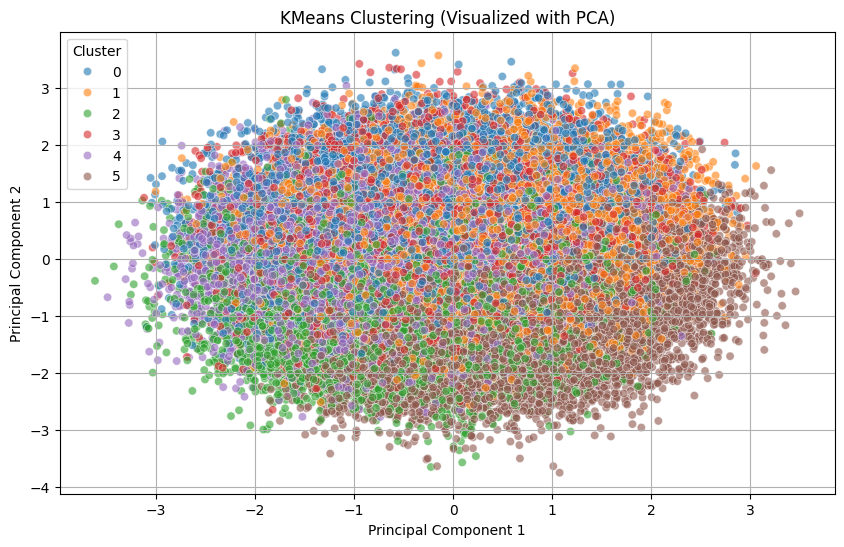

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# Apply KMeans with 6 clusters (matching 6 classes: 0 to 5)
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Compare clusters to actual hair fall classes
ari_score = adjusted_rand_score(y, kmeans_labels)
print(f"Adjusted Rand Index (KMeans vs. actual labels): {ari_score:.3f}")

# Use PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["Cluster"] = kmeans_labels

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Cluster", palette="tab10", alpha=0.6)
plt.title("KMeans Clustering (Visualized with PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

In [1]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X_scaled, y)

# Show feature importance scores

feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'F-Score': selector.scores_
}).sort_values(by='F-Score', ascending=False)

print(feature_scores)

NameError: name 'X_scaled' is not defined

In [10]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_scaled, y)

rf_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(rf_importance)

              Feature  Importance
5                iron    0.103067
0       total_protein    0.102942
9          liver_data    0.102738
3             vitamin    0.102730
4           manganese    0.102664
6             calcium    0.102020
1      total_keratine    0.101956
7  body_water_content    0.094207
2        hair_texture    0.093844
8        stress_level    0.093831


In [20]:
selected_features = [
    "liver_data",
    "vitamin",
    "manganese",
    "iron",
    "total_protein",
    "body_water_content",
    "hair_texture"
]

In [ ]:
X = df.drop(columns=["hair_fall"])
y = df["hair_fall"]

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Subset data
X_selected = X[selected_features]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Train Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluate
# print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.16      0.18      0.17      3348
           1       0.17      0.18      0.17      3317
           2       0.16      0.17      0.16      3296
           3       0.17      0.16      0.16      3328
           4       0.16      0.15      0.16      3345
           5       0.16      0.15      0.16      3366

    accuracy                           0.16     20000
   macro avg       0.16      0.16      0.16     20000
weighted avg       0.16      0.16      0.16     20000



In [11]:
# Feature Selection
# For now I'm using every column but it would be more efficent to select the most prominnet features from the data set
# 100,000 Data Points and 11 columns (Total Protein, Total Keratine, Hair Texture, Vitamin, Manganese, Iron, Calcium, Body Water Content, Stress Level, Liver Data, Hair Fall)
# No missing data points 
# Data mimics real world scenario data, is not a real world data set 

In [ ]:
# Standard Descriptions of Each Column 
print(df.describe())

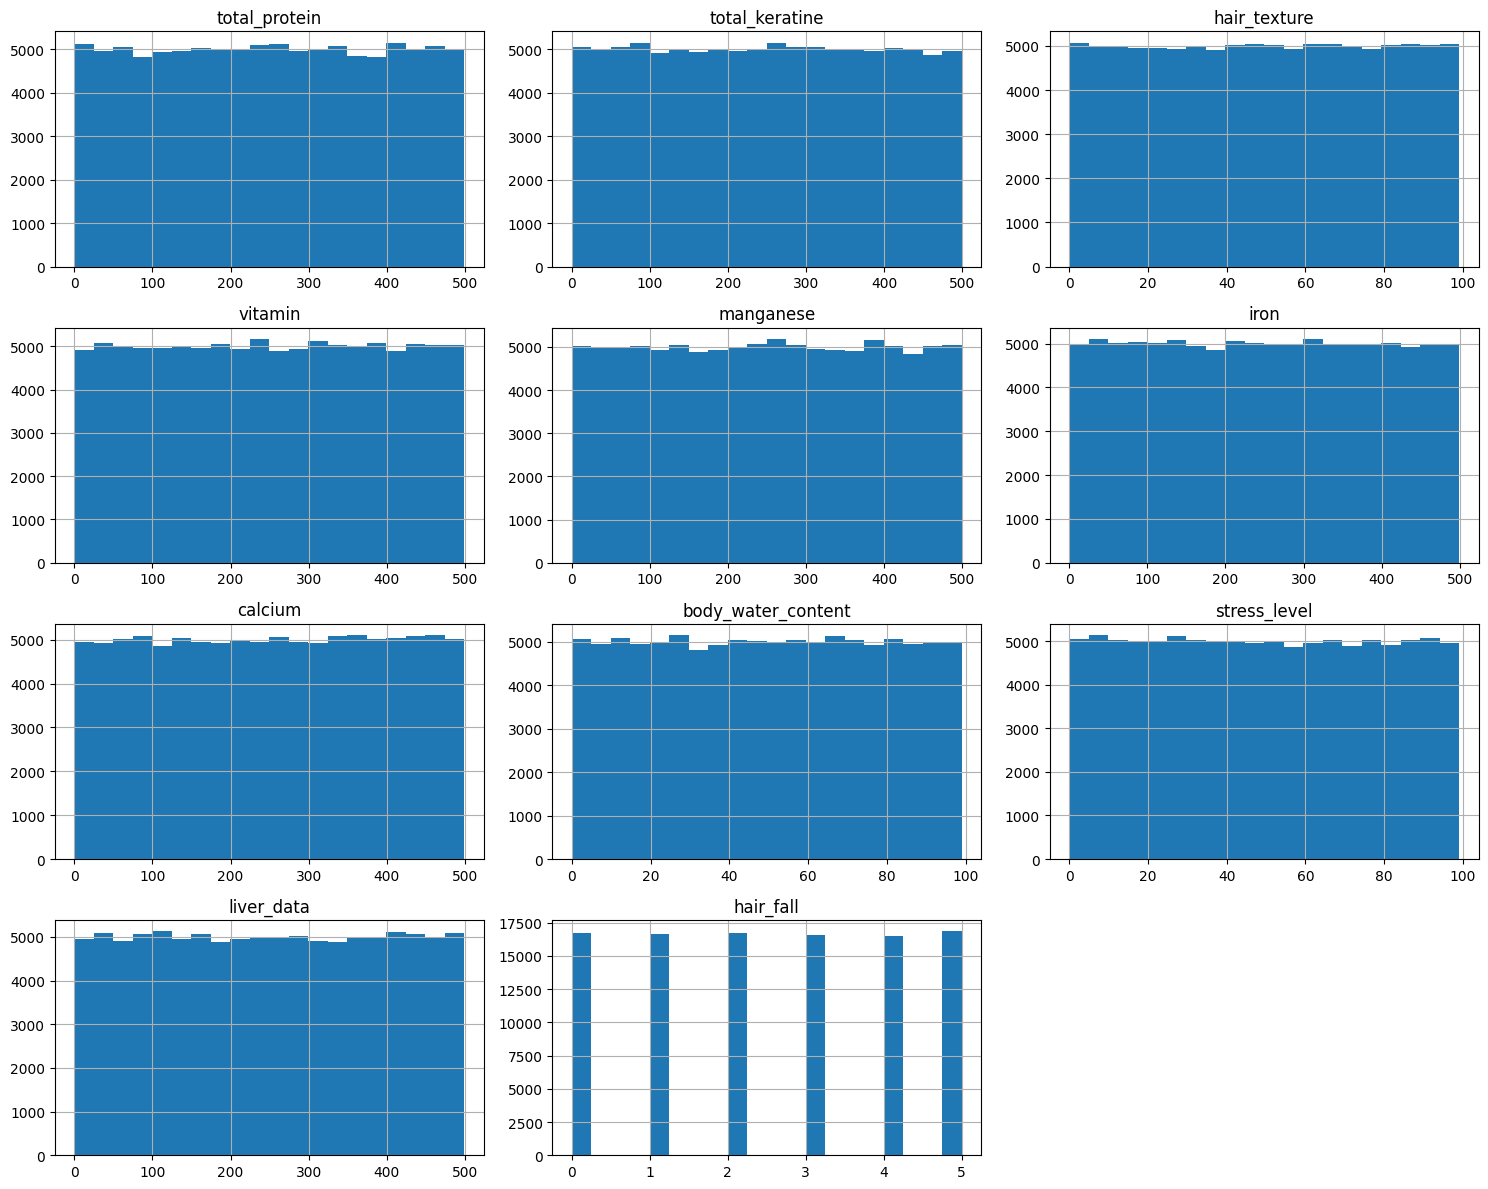

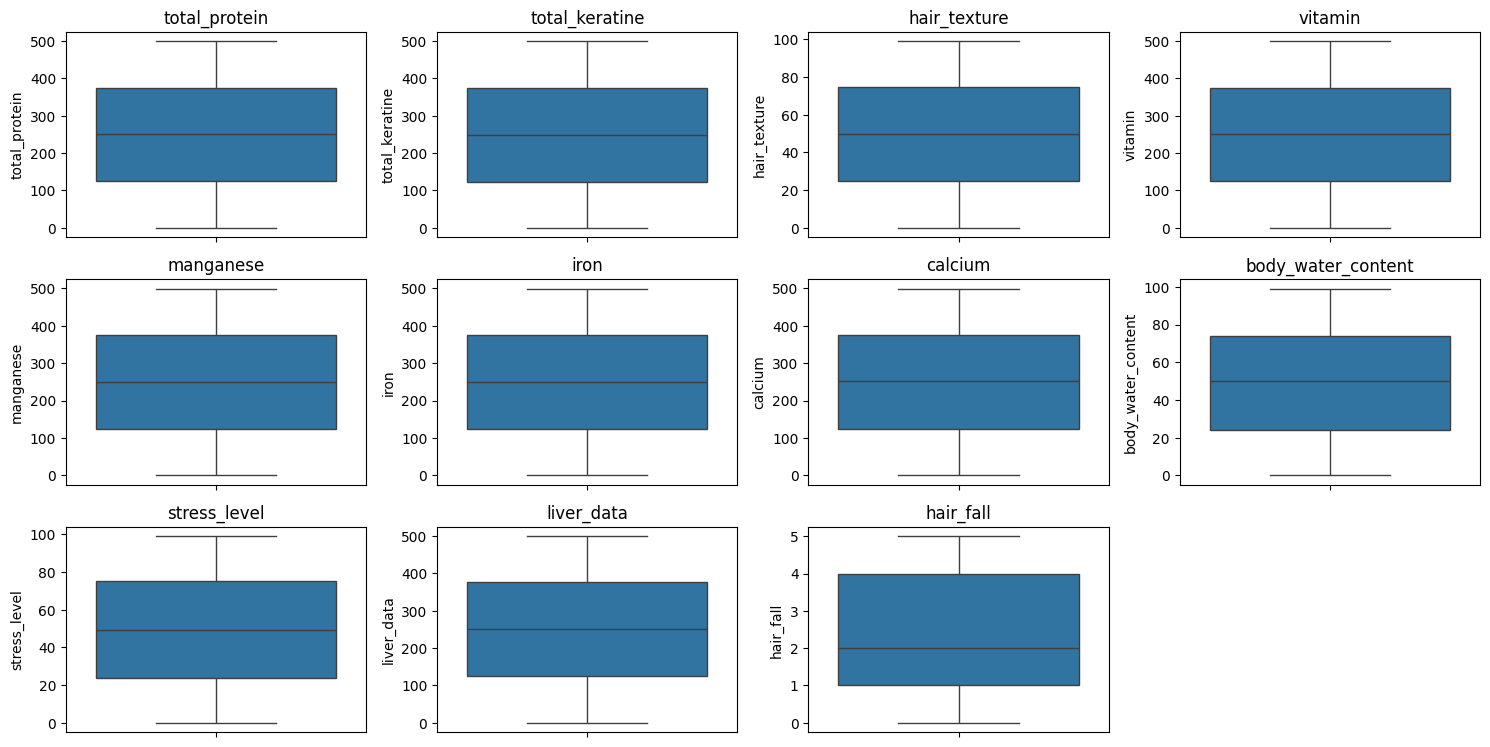

In [13]:
# Histograms for numerical features
df.hist(figsize=(15, 12), bins=20)
plt.tight_layout()
plt.show()

# Box plots to check for outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

In [14]:
X = df.drop(columns=["hair_fall"])
y = df["hair_fall"]

### Model Training

In [15]:
# Assuming you have features in X and target variable in y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42) # You can adjust hyperparameters
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
predictions = rf_classifier.predict(X_test)

### Model Evaluation

In [18]:
accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions, average="weighted")
precision = precision_score(y_test, predictions, average="weighted")
recall = recall_score(y_test, predictions, average="weighted")

In [19]:
print(f"Accuracy: {accuracy}")
print(f"F1: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.1679
F1: 0.1675746141416838
Precision: 0.16782423706046282
Recall: 0.1679
